In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('wide_range.xlsx')
layer = 11
X = df.iloc[:, 11:]
y = df.iloc[:, :11]

X.columns = X.columns.astype(str)
X = X.apply(lambda x: x*(10**12))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101)

In [16]:
X_train.columns

Index(['3.75e-06', '3.8e-06', '3.85e-06', '3.9e-06', '3.95e-06', '4e-06',
       '4.05e-06', '4.1e-06', '4.15e-06', '4.2e-06', '4.25e-06', '4.3e-06',
       '4.35e-06', '4.4e-06', '4.45e-06', '4.5e-06', '4.55e-06', '4.6e-06',
       '4.65e-06', '4.7e-06', '4.75e-06', '4.8e-06', '4.85e-06', '4.9e-06',
       '4.95e-06', '5e-06', '5.05e-06', '5.1e-06', '5.15e-06', '5.2e-06',
       '5.25e-06', '5.3e-06', '5.35e-06', '5.4e-06', '5.45e-06', '5.5e-06',
       '5.55e-06', '5.6e-06', '5.65e-06', '5.7e-06', '5.75e-06', '5.8e-06',
       '5.85e-06', '5.9e-06', '5.95e-06', '6e-06', '6.05e-06', '6.1e-06',
       '6.15e-06', '6.2e-06', '6.25e-06', '6.3e-06', '6.35e-06', '6.4e-06',
       '6.45e-06', '6.5e-06', '6.55e-06', '6.6e-06', '6.65e-06', '6.7e-06',
       '6.75e-06', '6.8e-06', '6.85e-06', '6.9e-06', '6.95e-06', '7e-06',
       '7.05e-06', '7.1e-06', '7.15e-06', '7.2e-06', '7.25e-06', '7.3e-06',
       '7.35e-06', '7.4e-06', '7.45e-06', '7.5e-06', '7.55e-06', '7.6e-06',
       '7.65e-06', '

In [5]:
forest = RandomForestRegressor(n_estimators=500, random_state=101)

forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=101)

In [17]:
importances = forest.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

feat_labels = df.columns[11:]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) 3.95e-06                       0.145655
 2) 4e-06                          0.116734
 3) 4.65e-06                       0.067398
 4) 4.7e-06                        0.051155
 5) 5.1e-06                        0.024191
 6) 4.75e-06                       0.022417
 7) 4.8e-06                        0.018299
 8) 6.2e-06                        0.016327
 9) 4.35e-06                       0.015603
10) 4.6e-06                        0.015344
11) 3.9e-06                        0.015332
12) 5.2e-06                        0.014843
13) 5.95e-06                       0.014526
14) 4.4e-06                        0.014522
15) 5.25e-06                       0.014402
16) 6.15e-06                       0.014303
17) 6.05e-06                       0.012569
18) 4.5e-06                        0.012083
19) 6.25e-06                       0.011665
20) 6.1e-06                        0.011163
21) 4.85e-06                       0.011159
22) 4.55e-06                       0.011004
23) 5.4e-06                     

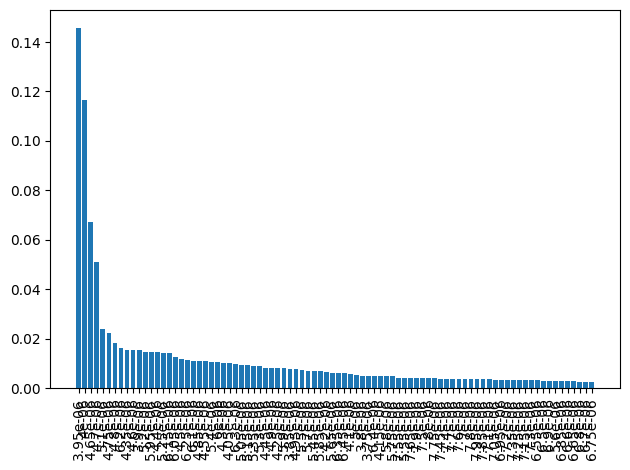

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [25]:
linear_model = LinearRegression()

rfe = RFE(estimator=linear_model, n_features_to_select=30)

In [26]:
X_selected = rfe.fit_transform(X, y)
selected_feature_indices = rfe.get_support(indices=True)

In [27]:
print(selected_feature_indices)

[56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
 80 81 82 83 84 85]


In [28]:
for i in selected_feature_indices:
    print(X.columns[i])

6.55e-06
6.6e-06
6.65e-06
6.7e-06
6.75e-06
6.8e-06
6.85e-06
6.9e-06
6.95e-06
7e-06
7.05e-06
7.1e-06
7.15e-06
7.2e-06
7.25e-06
7.3e-06
7.35e-06
7.4e-06
7.45e-06
7.5e-06
7.55e-06
7.6e-06
7.65e-06
7.7e-06
7.75e-06
7.8e-06
7.85e-06
7.9e-06
7.95e-06
8e-06


In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
importance = model.coef_

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
sorted_indices = np.argsort(importance)[::-1]

feat_labels = X.columns

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) layer 6                        0.000000
 2) layer 4                        0.000000
 3) layer 9                        0.000000
 4) 4.75e-06                       0.000000
 5) layer 10                       0.000000
 6) layer 2                        0.000000
 7) 4.7e-06                        0.000000
 8) 4.8e-06                        0.000000
 9) 4.85e-06                       0.000000
10) 4.9e-06                        0.000000
11) 4.95e-06                       0.000000
12) 5e-06                          0.000000
13) 4.65e-06                       0.000000
14) 5.05e-06                       0.000000
15) 5.1e-06                        0.000000
16) 7.7e-06                        0.084467
17) 7.75e-06                       0.076019
18) 7.65e-06                       0.100765
19) 7.8e-06                        0.086554
20) 7.85e-06                       0.103424
21) 7.6e-06                        0.100544
22) 7.9e-06                        0.069630
23) 5.15e-06                    